In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
import nltk

In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
from wordcloud import WordCloud,STOPWORDS

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df = pd.read_csv('Elon_musk.csv',index_col='Unnamed: 0')
df.head()

,Text
1,@kunalb11 I�m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [6]:
df.shape

(1999, 1)

In [7]:
#Lets clean the tweets (remove @'s and urls )
new = []
for t in df.Text:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    t = re.sub('\w*\d\w*', '', t)
    new.append(t)
    
df['Text'] = new

In [8]:
df.head(4)

,Text
1,I�m an alien
2,Ray tracing on Cyberpunk with HDR is next-leve...
3,Great interview!
4,Doge is underestimated


In [9]:
df_copy = df.copy()

In [10]:
df['Text'] = df.Text.apply(lambda x:re.sub('[^a-zA-Z0-9]'," ",x.lower()))

In [11]:
df.head(4)

,Text
1,i m an alien
2,ray tracing on cyberpunk with hdr is next leve...
3,great interview
4,doge is underestimated


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [13]:
stop = stopwords.words('english')
df.Text = df.Text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
df.sample(6)

,Text
1048,waymo impressive highly specialized solution t...
1573,main engineering locations palo alto austin am...
857,every days
926,soon complete testing amp regulators approve m...
1211,seem like opposite open openai essentially cap...
670,first merlin engine design really bad tbh noth...


In [15]:
type(df.Text[1111])

str

In [16]:
df.Text[1111] #book = [x for x in book if x]

''

In [17]:
df.sample(10)

,Text
767,rt thank served sacrificed veteransday
1467,rt tesla model satisfying car across ages stud...
615,andrej awesome said talented autopilot
1671,congratulations amp completing first crewed dr...
514,rt station dragon going orbital night period e...
20,true power haha
1345,bombard earth enough photons eventually emits ...
782,rt rumor austin chalk geologically one best so...
1115,exactly
593,tesla vehicle creating amp producing many usef...


In [18]:
cv = CountVectorizer()

In [19]:
df_cv = cv.fit_transform(df.Text)
data_stop = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df.index

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
data_stop

,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,york,young,yup,zealand,zenit,zero,zeroes,zeros,zon,zone
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
string_Total = " ".join(df.Text)

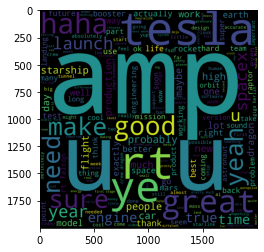

In [22]:
#wordcloud for entire corpus
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 2000,
                height = 2000
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [23]:
from textblob import TextBlob

In [24]:
pol = lambda x: TextBlob(x).sentiment.polarity
df['sentiment'] = df.Text.apply(pol)

In [25]:
df.sample(10)

,Text,sentiment
681,u,0.000000
768,rt crew access arm swings place,0.000000
1686,rt view inside dragon endeavour amp monitor de...,0.000000
1232,intend increase reduce battery cell purchases ...,0.000000
1541,great one,0.800000
990,rt dragon spacecraft supporting spacex cargo r...,0.125000
992,least success set possible outcomes time,0.000000
406,writing cobra kai sick u,-0.714286
409,unfortunately pedestrian speaker needed otherw...,-0.025000
1130,starlink revolution connectivity esp,0.000000


In [26]:
!python -m spacy validate


[+] Loaded compatibility table

================= Installed pipeline packages (spaCy v3.2.2) =================
[i] spaCy installation: C:\Anaconda\lib\site-packages\spacy

NAME             SPACY            VERSION      
en_core_web_lg   >=3.2.0,<3.3.0   3.2.0     [+]
en_core_web_md   >=3.2.0,<3.3.0   3.2.0     [+]
en_core_web_sm   >=3.2.0,<3.3.0   3.2.0     [+]



2022-03-29 15:48:34.032728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-29 15:48:34.032756: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [27]:
spacy.__version__

'3.2.2'

In [28]:
sia = SentimentIntensityAnalyzer()

In [29]:
# Dropping blank comments
blanks = []
for i,x in df_copy.itertuples():
    if x == str(''):  
        blanks.append(i)

len(blanks)

67

In [30]:
df_copy.drop(blanks,inplace=True,)

In [31]:
df_copy

,Text
1,I�m an alien
2,Ray tracing on Cyberpunk with HDR is next-leve...
3,Great interview!
4,Doge is underestimated
5,Congratulations Tesla China for amazing execut...
...,...
1995,"True, it sounds so surreal, but the negative p..."
1996,Make sure to read ur terms &amp; conditions be...
1997,Samwise Gamgee
1998,Altho Dumb and Dumber is <U+><U+>


In [32]:
df['scores'] = df.Text.apply(lambda Text: sia.polarity_scores(Text))

In [33]:
df.head()

,Text,sentiment,scores
1,alien,-0.25,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,ray tracing cyberpunk hdr next level tried,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,great interview,0.80,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
4,doge underestimated,0.00,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp..."
5,congratulations tesla china amazing execution ...,0.20,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."


In [34]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [35]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,Text,sentiment,scores,compound,comp_score
1,alien,-0.25,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,ray tracing cyberpunk hdr next level tried,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,great interview,0.80,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
4,doge underestimated,0.00,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,neg
5,congratulations tesla china amazing execution ...,0.20,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,pos


In [36]:
df.value_counts('comp_score')

comp_score
pos    1802
neg     197
dtype: int64

In [37]:
df_copy['scores'] = df_copy.Text.apply(lambda Text: sia.polarity_scores(Text))
df_copy['compound']  = df_copy['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Text,sentiment,scores,compound,comp_score
1,alien,-0.25,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,ray tracing cyberpunk hdr next level tried,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,great interview,0.80,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
4,doge underestimated,0.00,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,neg
5,congratulations tesla china amazing execution ...,0.20,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,pos


In [38]:
df_copy['comp_score'] = df_copy['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df_copy.head()

,Text,scores,compound,comp_score
1,I�m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,Ray tracing on Cyberpunk with HDR is next-leve...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",0.6588,pos
4,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,neg
5,Congratulations Tesla China for amazing execut...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",0.8513,pos


In [39]:
df_copy.value_counts('comp_score')

comp_score
pos    1701
neg     231
dtype: int64

In [40]:
df['sentiii'] = df['sentiment'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,Text,sentiment,scores,compound,comp_score,sentiii
1,alien,-0.25,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,neg
2,ray tracing cyberpunk hdr next level tried,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,pos
3,great interview,0.80,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos,pos
4,doge underestimated,0.00,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,neg,pos
5,congratulations tesla china amazing execution ...,0.20,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,pos,pos


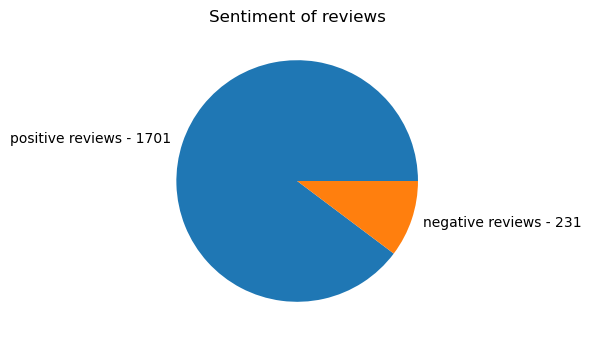

In [41]:
plt.figure(dpi=100)
plt.pie(df.value_counts('sentiii'),labels=['positive reviews - 1701','negative reviews - 231']);
plt.title('Sentiment of reviews');